In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('retail_data.csv')  # Replace 'path_to_your_dataset.csv' with the actual path to your dataset

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types and missing values
print("\nData types and missing values:")
print(df.info())


First few rows of the dataset:
   CustomerID  Age  Gender  AnnualIncome  SpendingScore  ProductCategory  \
0           1   58    Male         60038             41  Health & Beauty   
1           2   57    Male         31577             91  Health & Beauty   
2           3   39  Female        117404             26        Groceries   
3           4   33    Male         87434             94      Electronics   
4           5   18    Male         90225             10  Health & Beauty   

   ProductPrice PurchaseDate  StoreID StoreLocation   PaymentMethod  \
0        147.43   2022-06-11       46      San Jose     Credit Card   
1        402.09   2023-06-05       53   Los Angeles  Mobile Payment   
2        958.45   2020-10-14       95  Philadelphia  Mobile Payment   
3        544.17   2021-08-27       24        Dallas     Credit Card   
4        645.75   2023-06-06        2   San Antonio     Credit Card   

   DiscountApplied  DiscountPercent  ProductCost  Profit  FootTraffic  \
0           

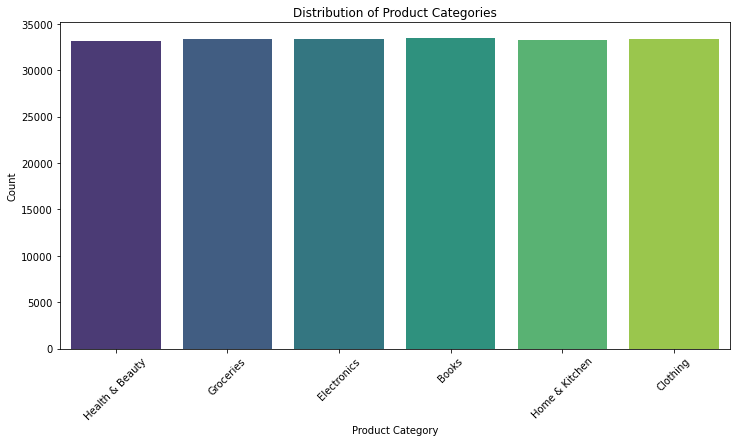

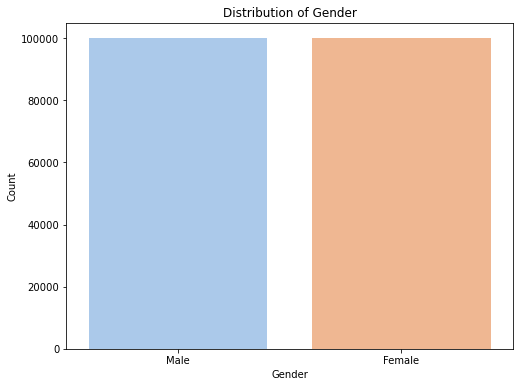

In [3]:
# Distribution of Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ProductCategory', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


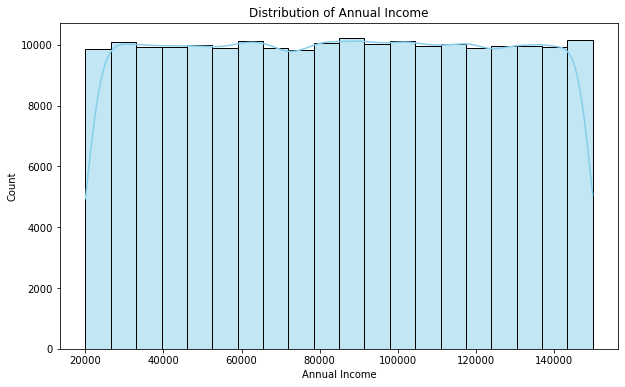

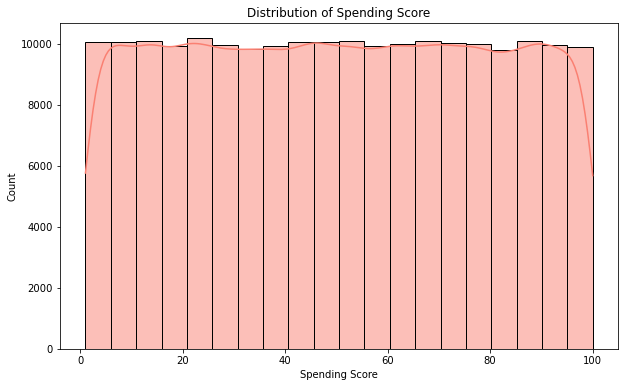

In [4]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AnnualIncome', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SpendingScore', bins=20, kde=True, color='salmon')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()


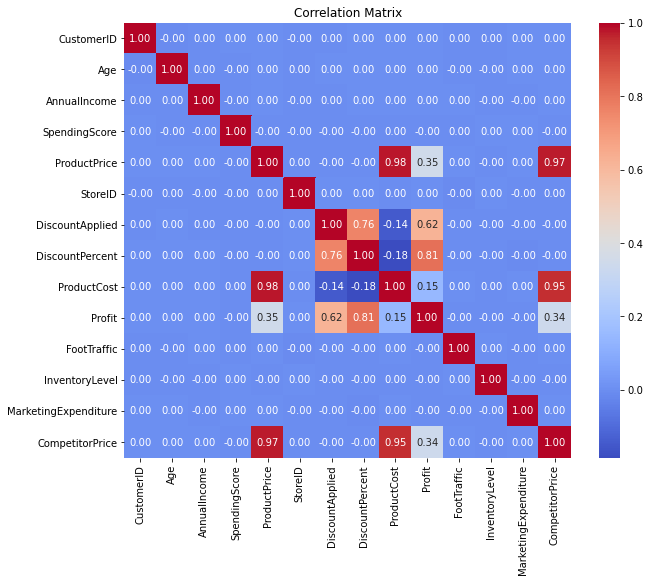

In [5]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


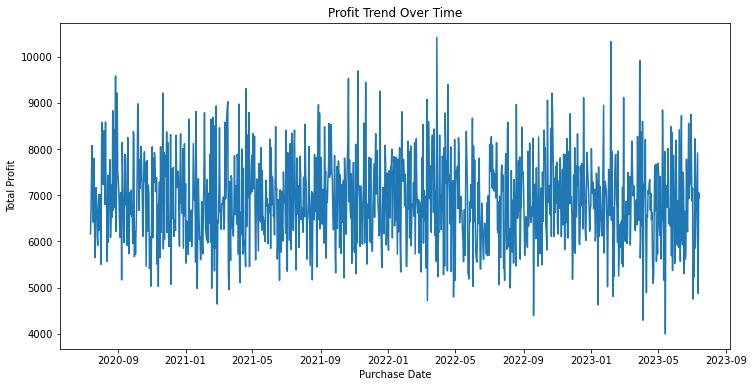

In [6]:
# Convert 'PurchaseDate' to datetime format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Extract month and year from 'PurchaseDate'
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month

# Plotting sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='PurchaseDate', y='Profit', estimator='sum', ci=None)
plt.title('Profit Trend Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Profit')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


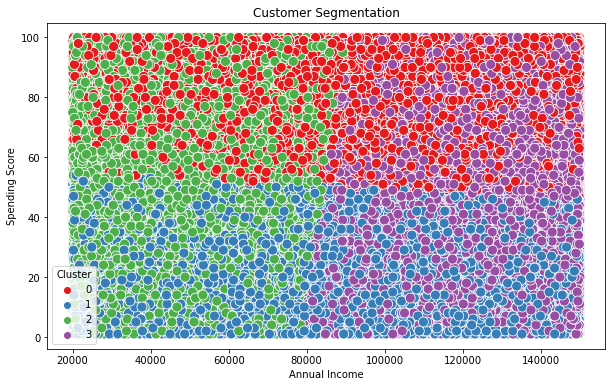

In [7]:
from sklearn.cluster import KMeans

# Select relevant features for segmentation
features = ['Age', 'AnnualIncome', 'SpendingScore']

# Standardize the features
scaled_features = (df[features] - df[features].mean()) / df[features].std()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


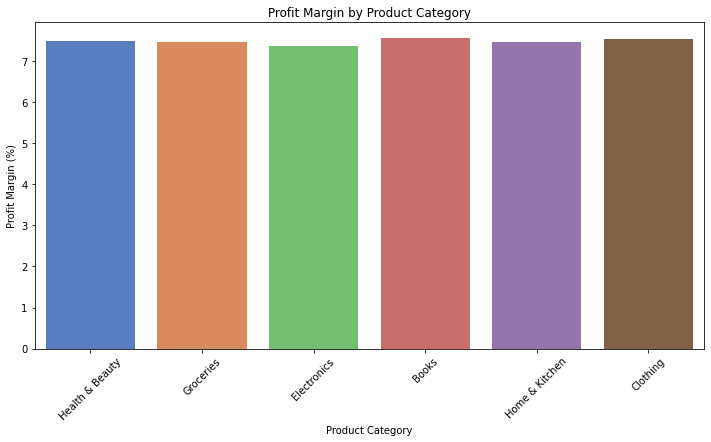

In [8]:
# Calculate profit margin
df['ProfitMargin'] = (df['Profit'] / df['ProductPrice']) * 100

# Plotting profit margin by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='ProductCategory', y='ProfitMargin', ci=None, palette='muted')
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()


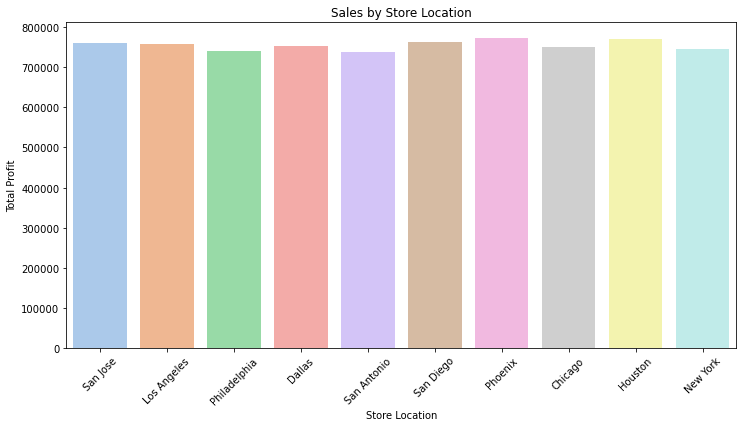

In [9]:
# Plotting sales by store location
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='StoreLocation', y='Profit', estimator=sum, ci=None, palette='pastel')
plt.title('Sales by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()
